#  SOQCS Example 7: Boson sampling example.

<p style='text-align: justify;'>In this example a random circuit of four channels is generated and two photons are created, one in each of the first two channels. An exact calculation of the output is then carried out using one of the SOQCS cores and also an approximated calculation by sampling using Clifford A algorithm [1]. Both results are printed for comparison.</p>
<br>
<br>
[1] Peter Clifford and Raphael Clifford. <it>The Classical Complexity of Boson Sampling</it>, <b>Proceedings of the 2018 Annual ACM-SIAM Symposium on Discrete Algorithms (SODA)</b> pages 146:155. 

In [1]:
import soqcs                     # Import SOQCS
import pandas                    # Import PANDAS for plotting
from collections import Counter  # Import collections

## Build a random circuit

A circuit of four channels is created. With the gate random_circuit() a random matrix is assigned to the circuit.

In [2]:
example = soqcs.qodev(2,4)
example.add_photons(1,0)
example.add_photons(1,1)
example.random_circuit()
example.detector(0)
example.detector(1)
example.detector(2)
example.detector(3)

## Obtain a list of samples

Create a simulator:

In [3]:
sim = soqcs.simulator() 

A few samples are obtained.

In [4]:
sample=sim.get_sample(example,N=5,method=0)
print(sample)

['1100', '0101', '1100', '0101', '1100']


We can run the simulator for a few more and use the resulting list to build an histogram using pandas (or any other tool)

<AxesSubplot:>

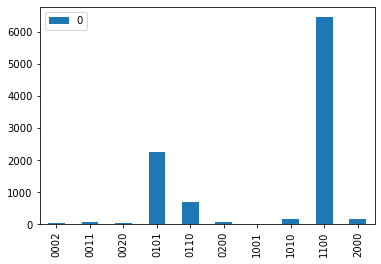

In [5]:
# Generate list of samples
sample=sim.get_sample(example,10000,0)
# Create and lot the histogram.
count = Counter(sample)
count=dict(sorted(count.items()))
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

## Perform a comparison between sampled and exact results

Asking to SOQCS to directly generate and plot the probability distribution of the samples is faster. Below we perform,

    - An exact simulation.
    - A sampling procedure

In [6]:
apdexact=sim.run(example)             # Run a simulation
apdsample=sim.sample(example,1000000) # Run a sampling procedure with one million samples.

Exact calculation plot:

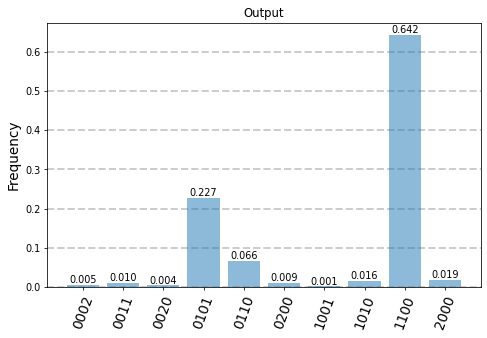

In [7]:
apdexact.show(dpi=70)

Sampling result plot:

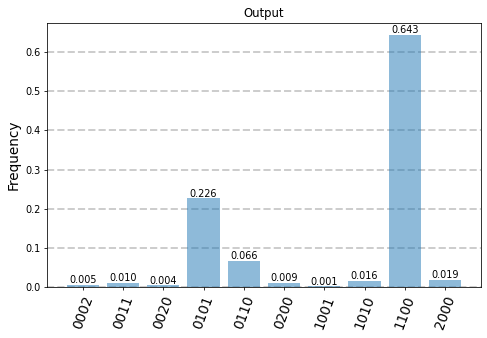

In [8]:
apdsample.show(dpi=70)

**THIS CODE IS PART OF SOQCS** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>